<a href="https://colab.research.google.com/github/chajmz/Dataquest/blob/master/Orbit_PEDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pandas.io.json import json_normalize    
from datetime import datetime
from datetime import date
from google.colab import drive

In [266]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
#%cd /gdrive

Mounted at /gdrive


In [0]:
with open("/gdrive/My Drive/orbit_big.csv",encoding='utf-16') as data_file:    
    df = pd.read_csv(data_file)  

In [0]:
pattern_examiner = r'[|]{2}([Pp][rimary]\w*\s\w*)[\:]([\s\w-]*)[|]+'
pattern_art_unit = r'[|]+([Aa]\w*\s[Uu]\w*[.: ]*\w{3}[=]+)([0-9]+)[|]+'
pattern_extension = r'\s([Ee]+\w{3}[=]+)([0-9]+)[|]+'
pattern_clms = r'\s([NnCcLl]{3}[=]+)([0-9]+)[|]+'
pattern_draw = r'\s([NnDdRr]{3}[=]+)([0-9]+)[|]+'
pattern_title = r'[(](\w{2}[D]?[0-9]+)[)][|]([\w, ().:=?-]+)'

assignees_list = ['THALES','BOEING','AIRBUS','HONEYWELL','SAFRAN','COLLINS','BAE SYSTEMS','GARMIN','PANASONIC','ROSEMOUNT','ELBIT','GE AVIATION'] 

In [0]:
def applyPattern(df_csv):
  df_csv['art_unit'] = df_csv['NO'].str.extract(pattern_art_unit)[1]
  df_csv['extension_days'] = df_csv['NO'].str.extract(pattern_extension)[1]
  df_csv['examiner'] = df_csv['NO'].str.extract(pattern_examiner)[1]
  df_csv['draw_nb'] = df_csv['NO'].str.extract(pattern_draw)[1]
  df_csv['clms_nb'] = df_csv['NO'].str.extract(pattern_clms)[1]
  df_csv['clean_title'] = df_csv['TI'].str.extract(pattern_title)[1]
  df_csv['clean_num'] = df_csv['TI'].str.extract(pattern_title)[0]
  return df_csv

In [0]:
#df_csv['examiner'].unique()
#r = ['(' + e[1:] + ')' + ' ou ' for e in exam['examiner']]
#lisT_exam_orbit = "".join(r)

In [271]:
df.sample(5,random_state=0)

,PR.§1,AP.§1,PN.PN,FAN,FAMILY_PN,EPRD,EAPD,EPD,EPDG,ACT.EED,TI,AB,PA,IN,RP,ADB,ICLM,OBJ,KEYW,KWIC,PCL,ACT.STATUS,ACT,DS,EPRC,NO,FD
10792,2009US-12509471|2012US-13467160,"US12/509,471|US13/467,160|WOUS2010/040088",US8753458|US8695669|US20120216957|WO2011/01692...,44305429,WO2011/016922 A1 2011-02-10 [WO201116922...,2009-07-26,2009-07-26,2011-01-27,2014-04-15,(WO201116922A1)|2013-01-26|(US8695669B2)|2029-...,(WO201116922)|Mapping tow splices in composite...,(WO2011/016922)|The three dimensional (3-D) lo...,BOEING,ENGELBART ROGER W|HANNEBAUM REED|RECTOR ERIC,"(WO201116922)|PLANK, Dennis R. et al. ([US])|(...","(WO2011/016922)|Accordingly, there is a need f...",(WO2011/016922)|1. A method of mapping the loc...,(WO2011/016922)|For the purposes of this descr...,"(US8753458)|TOW(100,48)|SPLICE LOCATION(100,30...",ECLM|(US8695669)|19. An apparatus configured t...,PCLO=156351000|PCLO=156064000|PCLX=156361000|P...,(WO201116922A1)|LAPSED|(US8695669B2)|GRANTED|(...,(WO201116922)|LEGAL DETAILS FOR WO2011/016922|...,(WO201116922)|National States: AE AG AL AM AO...,US,(WO201116922)|Extended kind: xc||(US2012021695...,"(US8695669)|Division of: US12/509,471 FDD=2009..."
13612,2014EP-0194526,"RU2015136394|US14/818,360|CN201510573992|JP201...",RU2695090|RU2015136394|US10001024|RU2015136394...,73094354,US10001024 B2 2018-06-19 [US10001024]...,2014-11-24,2014-11-24,2016-05-24,2018-06-19,(US10001024B2)|2036-05-26|(EP3023511A1)|2034-1...,(US10001024)|Abradable composition and seal of...,(US10001024)|The invention relates to a compos...,SAFRAN AERO BOOSTERS,SCHUSTER LAURENT,(US10001024)|Sandberg Phoenix & von Gontard P....,(US10001024)|The rotation of the rotor about i...,(US10001024)|1. A turbomachine comprising: a r...,(US10001024)|The invention relates to a compos...,"(US20160146034)|ROUNDED SUPPORT(100,25)|TURBOM...",EPD|2016-05-24||FAMILY_PN|(US10001024)|US10001...,PCLO=415173400|PCLX=106286500|PCLX=427447000|P...,(US10001024B2)|GRANTED|(EP3023511A1)|PENDING|(...,(US10001024)|LEGAL DETAILS FOR US20160146034|A...,(EP3023511)|Contracting States: AL AT BE BG C...,EP,(US20160146034)|Number of Drawings: NDR=2||Num...,(US10001024)|Previous publication: US201601460...
397,2017US-15724033,"EP18198516|US15/724,033",EP3468091|US20190103952,84025465,US20190103952 A1 2019-04-04 [US201901039...,2017-10-03,2017-10-03,2019-04-04,NaN,(US20190103952A1)|2037-10-03|(EP3468091A1)|201...,(US20190103952)|System and method for adaptive...,(US20190103952)|A method for aggregating usage...,HONEYWELL INTERNATIONAL|SATCOM1 FRANCE,GOUDAL FRANCOIS|KAUFFMANN ALBIN|NADER ADRIEN,"(EP3468091)|Houghton, Mark Phillip ; Patent Ou...","(US20190103952)|Accordingly, it is desirable t...",(US20190103952)|1 . A method for aggregating u...,(US20190103952)|The present invention generall...,"(EP3468091)|AIRCRAFT FLIGHT(100,23)|BROADBAND ...",AB|(US20190103952)|A method for aggregating us...,NaN,(US20190103952A1)|PENDING|(EP3468091A1)|LAPSED,(US20190103952)|LEGAL DETAILS FOR US2019010395...,(EP3468091)|Contracting States: AL AT BE BG C...,US,(US20190103952)|Number of Drawings: NDR=7||Num...,NaN
2095,2011FR-0056900,"EP12177427|CN201210262620|FR1156900|US13/552,104",EP2551191|CN102897328|FR2978423|US8818573|FR29...,8141440,US8818573 B2 2014-08-26 [US8818573]|...,2011-07-28,2011-07-28,2013-01-30,2014-08-26,(US8818573B2)|2033-02-20|(FR2978423B1)|2031-07...,(US8818573)|Method and device for detecting an...,(US8818573)|A detection device determines whet...,AIRBUS OPERATIONS|CNRS - CENTRE NATIONAL DE LA...,GOUPIL PHILIPPE|DAYRE RÉMY|LE BERRE HERVÉ|GHEO...,"(US8818573)|Wood, Herron & Evans, LLP|(FR29784...",(US8818573)|It is thus necessary to be in a po...,(US8818573)|1. A detection method for an uncon...,(US8818573)|The present invention thus relates...,"(EP2551191)|FEEDBACK COMMAND(100,7)|AIRCRAFT C...",AB|(US8818573)|A detection device determines w...,PCLO=701003000|PCLX=701039000,(US8818573B2)|GRANTED|(FR2978423B1)|GRANTED|(E...,(US8818573)|LEGAL DETAILS FOR US20130026287|Ac...,(EP2551191)|Con

In [272]:
print(df['EPD'][1])
#Date format %Y-%m-%d

date_col = ['EPRD', 'EAPD', 'EPD','EPDG']
for c in date_col:
  df[c] = pd.to_datetime(df[c])
df['days_grant'] = df['EPDG'] - df['EPRD']

2017-04-25


In [0]:
df = applyPattern(df)
#df_light = applyPattern(df).drop('FD',1)
#df_light.to_csv(r'/gdrive/My Drive/orbit_light.csv')

In [274]:
df_light.sample(4,random_state=0)
print(df.shape) 
print(df_light.shape)

(15018, 35)
(15018, 37)


In [0]:
def getArtUnit(df_csv):
    #Let's extract first 2 num of group art unit
  df_csv['prefix_art'] = df_csv['art_unit'].str[:2]
  df_csv['suffix_art'] = df_csv['art_unit'].str[2:]
  return df_csv

In [276]:
df = getArtUnit(df)
df.shape

(15018, 37)

In [0]:
def getTopPrefixForAssignee(assignee,n,df):
  df_a = df[df['PA'].str.contains(assignee)]
  top_prefix = df_a['prefix_art'].value_counts()
  return (top_prefix[top_prefix>n],assignee)

def normalizeAssignee(df):
  list_df = []
  df['norm_assignee'] = 'OTHER'
  for a in assignees_list:
    sub_df = df[df['PA'].str.contains(a)]
    sub_df['norm_assignee'] = a
    list_df.append(sub_df)
  list_df.append(df[df['PA'] == 'OTHER'])
  return pd.concat(list_df,axis=0)


In [278]:
df = normalizeAssignee(df)
df['granted_bool'] = df['days_grant'].notnull()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [279]:
df['granted_bool'].value_counts(dropna=False)

True     11922
False     3019
Name: granted_bool, dtype: int64

Text(12.334999999999994, 0.5, 'Assignees')

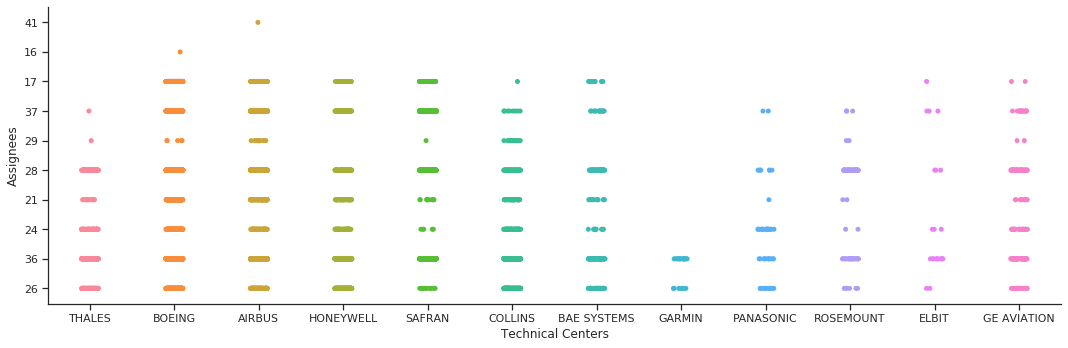

In [280]:
list_top_prefix = [getTopPrefixForAssignee(assignee,0,df) for assignee in assignees_list]
#sns.distplot( y=list_top_prefix[0][0], x=df_l_exam['prefix_art'] )
sns.set(style="ticks", color_codes=True)
fig = sns.catplot(x="norm_assignee", y="prefix_art", data=df[df['prefix_art'].notnull()],height = 5,aspect=3)
plt.xlabel('Technical Centers')
plt.ylabel('Assignees')

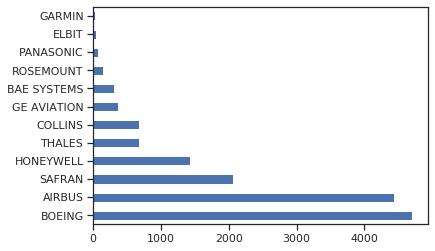

In [281]:
df['norm_assignee'].value_counts(dropna=True).head(30).plot(kind='barh')

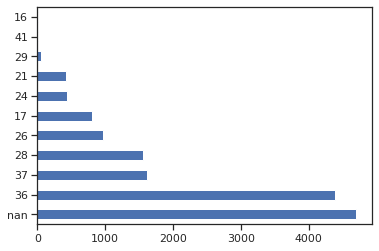

In [282]:
df['prefix_art'].value_counts(dropna=False).plot(kind='barh')

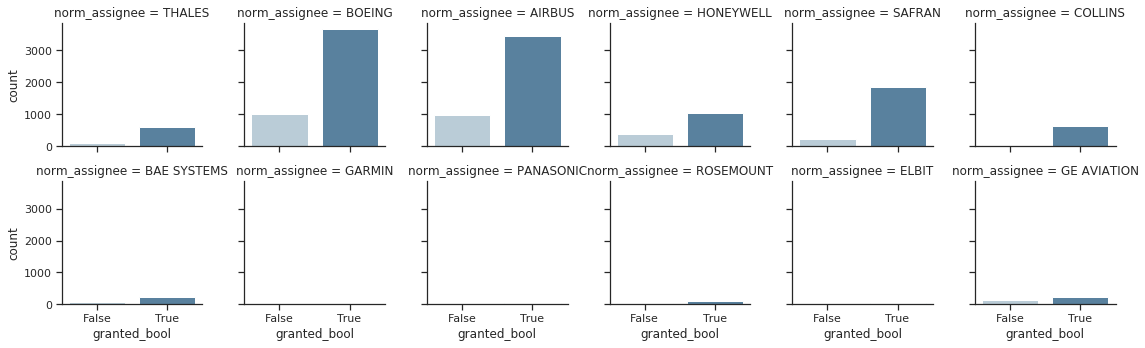

In [283]:
from  matplotlib.ticker import PercentFormatter
g = sns.catplot("granted_bool", col="norm_assignee", col_wrap=6,data=df, kind="count", height=2.5, aspect=1.05,palette="Blues",saturation=.5) 

plt.show()

(453,)

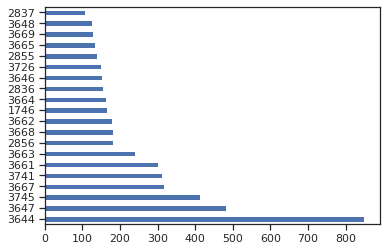

In [284]:
df['art_unit'].value_counts().head(20).plot(kind='barh')
df['art_unit'].value_counts().shape

242

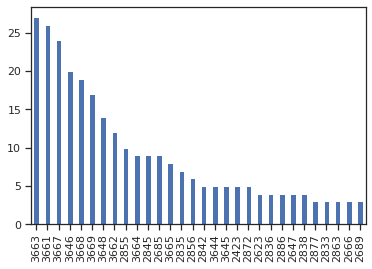

In [285]:
df_thales = df[df['norm_assignee'] == 'THALES']
df_t = df_thales['art_unit'].value_counts().head(30).plot(kind='bar')
df_t_sum = df_thales['art_unit'].value_counts().head(20).sum()
df_t_sum

In [286]:
df_thales['art_unit'].value_counts().describe()

count    140.000000
mean       3.071429
std        4.679118
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       27.000000
Name: art_unit, dtype: float64

count    169.000000
mean       3.804734
std        6.465364
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       50.000000
Name: art_unit, dtype: float64

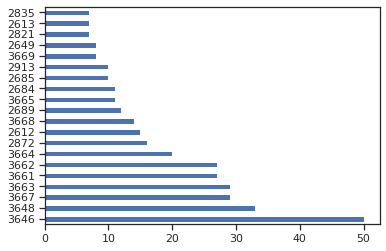

In [287]:
df_c = df[df['norm_assignee'] == 'COLLINS']
df_collins = df_c['art_unit'].value_counts().head(20).plot(kind='barh')
df_c['art_unit'].value_counts().describe()

In [0]:
#Les art units avec les meilleurs stats
#Les examinateurs avec les meilleurs stats dans un même art unit
#moyenne générale dans un art unit 
#calcul du temps depuis la première prio 
#temps moyen pour délivrer brevet par acteur
#examinateur meme si pas delivré ?
#stat par examinateur

In [0]:
from datetime import date
def getAssigneeDataFrame(assignee,df):
  return df[df['norm_assignee'] == assignee]

def computeTimeSinceFiling(df):
  df['days_filing'] = datetime.today() - df['EPRD']
  return df

def avgTimeToGrant(df):
  dic = {}
  for a in assignees_list:
    df_a = getAssigneeDataFrame(a,df)
    df_a = df_a[df_a['EPDG'].notnull()]
    dic[a] = df_a['days_grant'].mean().days
  return dic

In [0]:
df_boeing = getAssigneeDataFrame('BOEING',df)

In [291]:
df_boeing['days_filing'] = datetime.now() - df_boeing['EPRD']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [292]:
df = computeTimeSinceFiling(df)
dic_avg = avgTimeToGrant(df)
dic_avg['AIRBUS']

1174

In [0]:
df_dic = pd.DataFrame([dic_avg]).T
df_dic = df_dic.rename(columns={df_dic.columns[0]:'avg_day'})

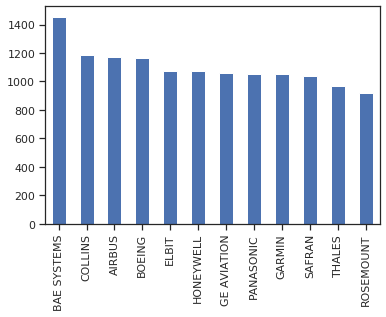

In [294]:
df_dic['avg_day'].sort_values(ascending=False).plot(kind='bar')

In [0]:
def getYearFilingForAssignee(assignee,df):
  df = getAssigneeDataFrame(assignee,df)
  g = df['EPRD'].dt.year.value_counts().sort_index().plot(kind='bar')
  g.set_xlabel('Year of Filing')
  g.set_ylabel('Number of Patent Filed')
  g.set_title('Year of Filing for the dataset')
  return g
#g.set_xlim()

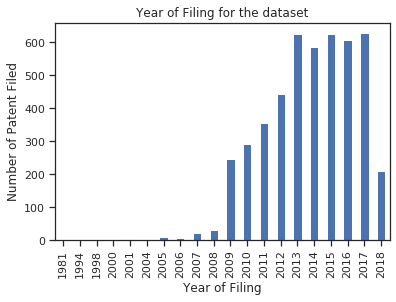

In [296]:
th = getYearFilingForAssignee('BOEING',df)

In [0]:
df['priority_year'] =  df['EPRD'].dt.year

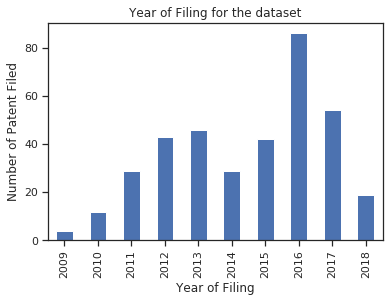

In [298]:
ge = getYearFilingForAssignee('GE AVIATION',df)

In [299]:
exam_thales = df_thales['examiner'].value_counts()
exam_thales_2 = exam_thales[exam_thales>2]
exam_thales_2

 Tarcza Thomas          14
 Cheung Calvin           7
 Cheung Mary             7
 Nguyen Tan Q            6
 Olszewski John R        6
 Black Thomas G          6
 Edwards Jerrah          5
 Phan Dao                4
 Bruckart Benjamin R     4
 Ratcliffe Luke          4
 Khatib Rami             4
 Patel Harshad R         4
 Camby Richard           4
 Nguyen John Q           4
 Trammell James          4
 Sotomayor John B        4
 Badii Behrang           3
 Nguyen Sang             3
 Brainard Timothy A      3
 Nguyen Tai T            3
 Barker Matthew M        3
 Shafi Muhammad          3
 Tran Khoi               3
 Gregory Bernarr E       3
 Gregory Bernarr         3
 Marc-Coleman Marthe     3
 Lin Abby Y              3
Name: examiner, dtype: int64

In [300]:
#peut on avoir un examiner si pas granted ? 
df_b_exam = df_boeing[df_boeing['granted_bool'] == False]

print(df_b_exam[df_b_exam['FD'].notnull()]['FD'])


329      (US20180362149)|Provisional Appl: US62/519,693...
543      (US20190241247)|Provisional Appl: US62/628,254...
761      (US20190144112)|CIP of: US15/815,689 FDD=2017-...
1426     (US20190048959)|Continuation of: US15/867,940 ...
1796     (US20190080615)|CIP of: US15/703,053 FDD=2017-...
                               ...                        
14507    (US20190270296)|Provisional Appl: US62/638,055...
14509    (US20190241752)|Provisional Appl: US62/625,785...
14510    (US20190240635)|Provisional Appl: US62/625,792...
14516    (US20190002739)|Provisional Appl: US62/527,432...
14828    (US20180255455)|CIP of: US15/451,291 FDD=2017-...
Name: FD, Length: 72, dtype: object


In [301]:
print(df_b_exam['FD'][1796])

(US20190080615)|CIP of: US15/703,053 FDD=2017-09-13 [2017US-15703053]


In [302]:
all_ex = df[df['examiner'].notnull()]['examiner'].unique()
all_l = []
all_ex[0]
df_e = df[df['examiner'] == all_ex[0]]
df_e

,PR.§1,AP.§1,PN.PN,FAN,FAMILY_PN,EPRD,EAPD,EPD,EPDG,ACT.EED,TI,AB,PA,IN,RP,ADB,ICLM,OBJ,KEYW,KWIC,PCL,ACT.STATUS,ACT,DS,EPRC,NO,FD,days_grant,art_unit,extension_days,examiner,draw_nb,clms_nb,clean_title,clean_num,prefix_art,suffix_art,norm_assignee,granted_bool,days_filing,priority_year
10,2016FR-0001112,"US15/652,801|FR1601112|CN201710585460",US10453234|FR3054314|US20180075632|CN107628258...,78601936,US10453234 B2 2019-10-22 [US10453234]...,2016-07-19,2016-07-19,2018-01-26,2018-08-31,(US10453234B2)|2037-07-18|(FR3054314B1)|2036-0...,(US10453234)|System for displaying avionic dat...,(US10453234)|The present invention relates to ...,THALES,Baron Luc|Garnavault Christophe|Aymeric Bruno|...,(US10453234)|Pearne & Gordon LLP|(FR3054314)|C...,(US10453234)|Other devices typically make it p...,(US10453234)|1. A system for displaying avioni...,(US10453234)|The present invention relates to ...,"(US10453234)|DISPLAY FORMAT(100,96)|AIRCRAFT(1...",AB|(US10453234)|The present invention relates ...,NaN,(US10453234B2)|GRANTED|(FR3054314B1)|GRANTED|(...,(US10453234)|LEGAL DETAILS FOR US20180075632|A...,NaN,FR,(US20180075632)|Number of Drawings: NDR=4||Num...,(US10453234)|Previous publication: US201800756...,773 days,2611,NaN,Wu Yanna,4,10,System for displaying avionic data on at least...,US10453234,26,11,THALES,True,1200 days 11:50:12.934521,2016
11794,2016US-15185785,"US15/185,785",US10417803|US20170365086,78089253,US10417803 B2 2019-09-17 [US10417803]...,2016-06-17,2016-06-17,2017-12-21,2019-09-17,2036-06-17,(US10417803)|Multiple-pass rendering of a digi...,(US10417803)|A method is provided for renderin...,BOEING,FLOYD JOSEPH FRANK|EAMES PATRICK JAMES|HADLEY ...,(US10417803)|Womble Bond Dickinson (US) LLP,(US10417803)|Display of an aircraft and its pa...,(US10417803)|1. An apparatus for rendering a s...,(US10417803)|The present disclosure relates ge...,"(US10417803)|PASS RENDERING(100,49)|SCENE(100,...",ADB|(US10417803)|Display of an aircraft and it...,NaN,GRANTED,(US10417803)|LEGAL DETAILS FOR US20170365086|A...,NaN,US,(US20170365086)|Number of Drawings: NDR=6||Num...,(US10417803)|Previous publication: US201703650...,1187 days,2611,NaN,Wu Yanna,6,24,Multiple-pass rendering of a digital three-dim...,US10417803,26,11,BOEING,True,1232 days 11:50:12.934521,2016


In [303]:
import re
re.findall(r'[\u4e00-\u9fff]+','구대성')

[]

In [304]:
def is_cjk(character):
    """"
    Checks whether character is CJK.

        >>> is_cjk(u'\u33fe')
        True
        >>> is_cjk(u'\uFE5F')
        False

    :param character: The character that needs to be checked.
    :type character: char
    :return: bool
    """
    return any([start <= ord(character) <= end for start, end in 
                [(4352, 4607), (11904, 42191), (43072, 43135), (44032, 55215), 
                 (63744, 64255), (65072, 65103), (65381, 65500), 
                 (131072, 196607)]
                ])
    
def isExaminerCJK(s):
  for c in s:
    if is_cjk(c):
      return True
  return False

isExaminerCJK('AAPOKMAKAMMA KALKJKLJLKA--')

False

In [0]:
#First value is examiner
#Second is mean days for grant patent
#Third is max value for granting a patent
#Fourth is the min days required for granting a patent
#Fifth is the number of case processed by the examiner
#Sixth is finally the group_art unit in which the examiner contribute the most
#Seventh is the company the most processed by the examiner (might be Boeing, Airbus or Safran due to the number ...)
all_l = []
for ex in all_ex:
  if isExaminerCJK(ex) == False :
    df_e = df[df['examiner'] == ex]
    meanV = df_e['days_grant'].mean().days
    maxV = df_e['days_grant'].max().days
    minV = df_e['days_grant'].min().days
    num_case = df_e.shape[0]
    art = df_e['art_unit'].value_counts().keys().tolist()[0]
    top_assignee = df_e['norm_assignee'].value_counts().keys().tolist()[0]
    percent_assignee = round((df_e['norm_assignee'].value_counts().head(1)[0])/num_case,1)
    l = [ex,meanV,maxV,minV,num_case,int(art),top_assignee,percent_assignee]
    all_l.append(l)

In [0]:
df_exam_s = pd.DataFrame(all_l, columns=['examiner','avg_for_grant','max_for_grant','min_for_grant','num_case','top_art_unit','top_assignee_processed','assignee_percent'])

In [307]:
df_exam_s.sample(10)

,examiner,avg_for_grant,max_for_grant,min_for_grant,num_case,top_art_unit,top_assignee_processed,assignee_percent
56,Troost Aaron L,1038,1786,566,16,3668,BOEING,0.2
2494,Desir Pierre Louis,778,778,778,1,2659,PANASONIC,1.0
2106,Ma Kun Kai,3079,3079,3079,1,3763,HONEYWELL,1.0
973,Carlson Marc,1141,1449,833,2,3723,BOEING,1.0
37,Khatib Rami,996,2048,645,27,3669,BOEING,0.3
426,Yao Sam,1532,1803,1233,4,3715,AIRBUS,0.5
106,Cherry Stephen,1032,1099,966,2,2863,BOEING,0.5
393,Musselman Timothy A,1359,2384,725,9,3715,BOEING,0.7
284,Gaffin Jeffrey A,1083,1454,668,5,2129,BOEING,0.8
39,Cicchino Patrick,931,931,931,1,3653,THALES,1.0
